# 🧠🤖 Brincando mais com o Neurônio de McCulloch-Pitts 

## Preparação

Copie a classe `MCPNeuron` construída na aula anterior para a célula abaixo. 

In [ ]:
# resposta:

class MCPNeuron:
    ... # TODO


In [2]:
!python -m pip install requests Pillow opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
     ---------------------------------------- 0.1/39.5 MB 2.6 MB/s eta 0:00:15
     ---------------------------------------- 0.3/39.5 MB 3.5 MB/s eta 0:00:12
     - -------------------------------------- 1.0/39.5 MB 7.9 MB/s eta 0:00:05
     - -------------------------------------- 1.9/39.5 MB 11.0 MB/s eta 0:00:04
     -- ------------------------------------- 2.7/39.5 MB 13.0 MB/s eta 0:00:03
     --- ------------------------------------ 3.7/39.5 MB 15.8 MB/s eta 0:00:03
     ----- ---------------------------------- 5.0/39.5 MB 16.8 MB/s eta 0:00:03
     ----- ---------------------------------- 5.9/39.5 MB 18.0 MB/s eta 0:00:02
     ------ --------------------------------- 6.8/39.5 MB 19.0 MB/s eta 0:00:02
     -------- ------------------------------- 8.1/39.5 MB 19.9 MB/s eta 0:00:02
     --------- ------------------------------ 9.3/39.


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Atividade: Implementando Circuitos 

Nesta atividade, vamos construir a nossa primeira **Rede Neural**, isto é, um conjunto de neurônios conectados que realizam uma ou mais tarefas.

Considere o circuito exibido na Figura 1. O objetivo desta atividade é implementar este circuito utilizando apenas neurônios MCP. 

Crie uma classe **MCPCircuit** para representar o circuito. A classe deve possuir os seguintes métodos: 
- **construtor**: deve inicializar atributos privados do tipo MCPNeuron para representar as portas lógicas. 
- **forward**: deve receber uma lista contendo os valores de A, B, C e D, nesta ordem, e retornar a saída do circuito. 
  - Adicione um *assert* para verificar se a entrada possui tamanho 4.
  - Os valores de A e B devem ser usados como entrada para o neurônio AND e o valor de C deve ser usado como entrada para o neurônio NOT. As saídas destes neurônios devem ser usadas como entrada para o neurônio OR. E assim por diante.
  - Lembre-se de utilizar *type hints* para informar os tipos de entrada e saída dos métodos.


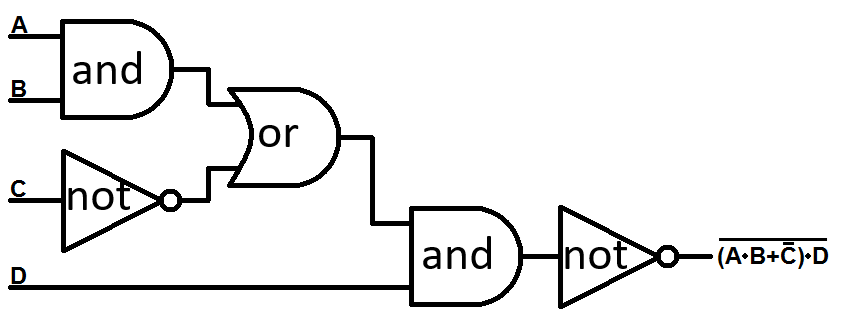

Figura 1: Circuito lógico.

In [ ]:

# resposta:

class MCPCircuit:
    def __init__(self):
        ...  # TODO

    def forward(self, x: list[float]) -> float:
        assert len(x) == 4, 'MCPCircuit expects 4 values as input'
        a, b, c, d = x

        ... # TODO


In [4]:
import itertools
import pandas as pd

def truth_table(circuit: MCPCircuit) -> pd.DataFrame:
    combinations = list(itertools.product([0, 1], repeat=4))
    table = [c + (circuit.forward(c), ) for c in combinations]
    return pd.DataFrame(table, columns='a b c d result'.split())


circuit = MCPCircuit()
truth_table(circuit)  # deve exibir a tabela verdade

,a,b,c,d,result
0,0,0,0,0,1.0
1,0,0,0,1,0.0
2,0,0,1,0,1.0
3,0,0,1,1,1.0
4,0,1,0,0,1.0
5,0,1,0,1,0.0
6,0,1,1,0,1.0
7,0,1,1,1,1.0
8,1,0,0,0,1.0
9,1,0,0,1,0.0


## Atividade: De volta ao XOR

Na aula passada, vimos que um neurônio MCP é incapaz de implementar a porta lógica XOR. 

Inspirados pelo exercício anterior, surge a questão: será que uma rede neural composta por sequências de neurônios MCP é capaz de implementar o XOR? E a resposta é **SIM**!

A Figura 2 mostra um circuito capaz de implementar o XOR usando portas lógicas AND, NOT e OR. 

Crie uma classe similar à anterior para reproduzir o circuito. 

Esta atividade demonstra um resultado importante: **redes neurais com sequências de duas ou mais camadas contendo funções de ativação não-lineares (como a função degrau utilizada até agora), são capazes de representar funções não lineares**!

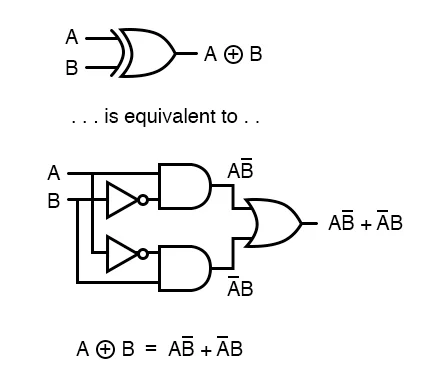

Figura 2: Circuito XOR.

In [ ]:

# resposta:

class XorCircuit:
    def __init__(self):
        ...  # TODO

    def forward(self, x: list[float]) -> float:
        assert len(x) == 2, 'xor should receive two values as input'
        a, b = x
        ...  # TODO



In [6]:
import itertools
import pandas as pd

def truth_table(circuit: MCPCircuit) -> pd.DataFrame:
    combinations = list(itertools.product([0, 1], repeat=2))
    table = [c + (circuit.forward(c), ) for c in combinations]
    return pd.DataFrame(table, columns='a b result'.split())


circuit = XorCircuit()
truth_table(circuit)  # deve exibir a tabela verdade do XOR

,a,b,result
0,0,0,0.0
1,0,1,1.0
2,1,0,1.0
3,1,1,0.0
